In [1]:
import tensorflow as tf
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import os
import stat
import math
import random

import shutil

from tqdm import tqdm

In [2]:
%matplotlib inline

## Code Start

In [3]:
CLEAN_DIR = './Data/Clean/'
DIRTY_DIR = './Data/Dirty/'
TRAINING_DIR = './Data/Training/'
TESTING_DIR = './Data/Testing/'
DEV_DIR = './Data/Dev/'

SPLIT_DIST = 0.1

batik_classes = os.listdir(CLEAN_DIR)

## Changing file permission

In [8]:
def change_perm(target):
    for batik_class in batik_classes:
        dir = os.path.join(target, batik_class)
        dir_content = os.listdir(dir)

        for image in tqdm(dir_content, ascii = False, desc = batik_class):
            dst_dir = os.path.join(dir, image)
            os.chmod(dst_dir, stat.S_IRWXU)

In [9]:
#change_perm(CLEAN_DIR)
change_perm(DIRTY_DIR)

batik-tambal: 100%|██████████| 708/708 [00:00<00:00, 22100.59it/s]


----------------------------------------------
# !RUN WITH CAUTION!
## Data Splitting
 Making the DIR necessary for storing images and spreading it from CLEAN_DIR to apropriate dir

In [12]:
def move_image(target):
    for batik_class in batik_classes:
        dir = os.path.join(target, batik_class)
        dir_content = os.listdir(dir)

        # Calculating how much image for splitting
        split_dist = math.ceil(len(dir_content) * SPLIT_DIST)

        # Picking random images
        testing_images = random.choices(dir_content, k = split_dist)

        # Moving things around
        for image in tqdm(dir_content, desc = batik_class):
            # If image is picked for testing
            if image in testing_images:
                src_dir = os.path.join(dir, image)
                dst_dir = os.path.join(TESTING_DIR, batik_class)

                shutil.copy(src_dir, dst_dir)
            else:
                src_dir = os.path.join(dir, image)
                dst_dir = os.path.join(TRAINING_DIR, batik_class)

                shutil.copy(src_dir, dst_dir)

In [13]:
# MKDIR data subdir
try:
    os.mkdir(TRAINING_DIR)
    os.mkdir(TESTING_DIR)
    os.mkdir(DEV_DIR)
except:
    print('Data subdir folder already exist')

# MKDIR working subdir
for batik_class in batik_classes:
    try:
        dir = os.path.join(TRAINING_DIR, batik_class)
        os.mkdir(dir)

        dir = os.path.join(TESTING_DIR, batik_class)
        os.mkdir(dir)

        dir = os.path.join(DEV_DIR, batik_class)
        os.mkdir(dir)
    except:
        print('Working subdir folder already exist')
        break

move_image(CLEAN_DIR)
move_image(DIRTY_DIR)

batik-tambal: 100%|██████████| 708/708 [00:08<00:00, 84.60it/s]


## Purge images from working dir

In [10]:
def purge_working_image(target):
    for batik_class in tqdm(batik_classes, desc = target):
        dir = os.path.join(target, batik_class)
        
        #print('Deleting ' + dir)
        shutil.rmtree(dir, ignore_errors = True)

In [11]:
purge_working_image(TRAINING_DIR)
purge_working_image(TESTING_DIR)
purge_working_image(DEV_DIR)

./Data/Dev/: 100%|██████████| 20/20 [00:00<00:00, 6665.56it/s]


----------------------------------------------

## Counting total images

In [4]:
def count_batik(target):
    try:
        batik_counter = {}

        for batik_class in batik_classes:
            dir = os.path.join(target, batik_class)
            dir_content = os.listdir(dir)

            batik_counter[batik_class] = 0
            for image in dir_content:
                batik_counter[batik_class] += 1
    except:
        print('Directory Empty!')
        print()
    else:
        for i in batik_counter:
            print(i + ' = ' + str(batik_counter[i]))

        print()
        print('Total images: ' + str(sum(batik_counter.values())))

In [4]:
print('CLEAN IMAGES')
print('-------------------------------------')

count_batik(CLEAN_DIR)

print('DIRTY IMAGES')
print('-------------------------------------')

count_batik(DIRTY_DIR)

CLEAN IMAGES
-------------------------------------
batik-bali = 49
batik-betawi = 43
batik-celup = 27
batik-cendrawasih = 25
batik-ceplok = 30
batik-ciamis = 34
batik-garutan = 30
batik-gentongan = 36
batik-kawung = 40
batik-keraton = 36
batik-lasem = 46
batik-megamendung = 46
batik-parang = 45
batik-pekalongan = 47
batik-priangan = 38
batik-sekar = 24
batik-sidoluhur = 45
batik-sidomukti = 34
batik-sogan = 23
batik-tambal = 31

Total images: 729
DIRTY IMAGES
-------------------------------------
batik-bali = 763
batik-betawi = 729
batik-celup = 805
batik-cendrawasih = 820
batik-ceplok = 364
batik-ciamis = 730
batik-garutan = 767
batik-gentongan = 707
batik-kawung = 767
batik-keraton = 663
batik-lasem = 726
batik-megamendung = 668
batik-parang = 786
batik-pekalongan = 786
batik-priangan = 572
batik-sekar = 734
batik-sidoluhur = 804
batik-sidomukti = 700
batik-sogan = 700
batik-tambal = 708

Total images: 14299


In [5]:
print('TRAINING IMAGES')
print('-------------------------------------')

count_batik(TRAINING_DIR)

print('TESTING IMAGES')
print('-------------------------------------')

count_batik(TESTING_DIR)

print('DEV IMAGES')
print('-------------------------------------')

count_batik(DEV_DIR)

TRAINING IMAGES
-------------------------------------
batik-bali = 733
batik-betawi = 695
batik-celup = 754
batik-cendrawasih = 762
batik-ceplok = 355
batik-ciamis = 692
batik-garutan = 720
batik-gentongan = 673
batik-kawung = 731
batik-keraton = 632
batik-lasem = 698
batik-megamendung = 644
batik-parang = 751
batik-pekalongan = 757
batik-priangan = 552
batik-sekar = 684
batik-sidoluhur = 768
batik-sidomukti = 664
batik-sogan = 657
batik-tambal = 667

Total images: 13589
TESTING IMAGES
-------------------------------------
batik-bali = 79
batik-betawi = 77
batik-celup = 78
batik-cendrawasih = 83
batik-ceplok = 39
batik-ciamis = 72
batik-garutan = 77
batik-gentongan = 70
batik-kawung = 76
batik-keraton = 67
batik-lasem = 74
batik-megamendung = 70
batik-parang = 80
batik-pekalongan = 76
batik-priangan = 58
batik-sekar = 74
batik-sidoluhur = 81
batik-sidomukti = 70
batik-sogan = 66
batik-tambal = 72

Total images: 1439
DEV IMAGES
-------------------------------------
batik-bali = 0
batik-

## Data Augmentation

In [10]:
IMAGE_SHAPE = [150, 150]
BATCH_SIZE = 64

In [11]:
training_datagen = ImageDataGenerator(
    # Might need further augmentation
    rescale = 1/255.0,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

testing_datagen = ImageDataGenerator(
    rescale = 1/255.0,
)

training_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

testing_generator = testing_datagen.flow_from_directory(
    TESTING_DIR,
    target_size=IMAGE_SHAPE,
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 13589 images belonging to 20 classes.
Found 1439 images belonging to 20 classes.


## Model

In [58]:
efn_model = tf.keras.applications.EfficientNetB0(
    include_top=False,
    input_shape=IMAGE_SHAPE + [3]
)

In [59]:
for layer in efn_model.layers:
    layer.trainable = False

In [44]:
efn_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
rescaling_4 (Rescaling)         (None, 150, 150, 3)  0           input_6[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, 150, 150, 3)  7           rescaling_4[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 151, 151, 3)  0           normalization_4[0][0]            
_____________________________________________________________________________________

In [56]:
last_layer = efn_model.get_layer('block6a_expand_activation')

In [57]:
x = tf.keras.layers.Flatten()(last_layer)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dense(20, activation='softmax')(x)

model = tf.keras.Model(efn_model.input, x)

TypeError: Inputs to a layer should be tensors. Got: <tensorflow.python.keras.layers.core.Activation object at 0x000001B2455AEB80>

In [40]:
'''global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
output_layer = tf.keras.layers.Dense(20, activation='softmax')
model = tf.keras.Sequential([
    efn_model,
    global_average_layer,
    output_layer
])'''

In [12]:

#Vanilla model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SHAPE + [3])),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation = 'relu'),
    #20 Batik class, might add more later?
    tf.keras.layers.Dense(20, activation = 'softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 82944)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               21233920  
_________________________________________________________________
dense_1 (Dense)              (None, 20)                5

## Compiling

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Training

In [14]:
history = model.fit(
    training_generator,
    validation_data=testing_generator,
    epochs=5
)

Epoch 1/5
213/213 [==============================] - 382s 2s/step - loss: 3.0998 - accuracy: 0.0598 - val_loss: 2.9684 - val_accuracy: 0.0618
Epoch 2/5
213/213 [==============================] - 161s 758ms/step - loss: 2.9601 - accuracy: 0.0759 - val_loss: 2.9373 - val_accuracy: 0.0924
Epoch 3/5
213/213 [==============================] - 81s 382ms/step - loss: 2.9309 - accuracy: 0.0911 - val_loss: 2.8894 - val_accuracy: 0.1015
Epoch 4/5
213/213 [==============================] - 81s 380ms/step - loss: 2.8939 - accuracy: 0.1127 - val_loss: 2.8904 - val_accuracy: 0.1133
Epoch 5/5
213/213 [==============================] - 82s 385ms/step - loss: 2.8614 - accuracy: 0.1223 - val_loss: 2.8433 - val_accuracy: 0.1286


## Graphing

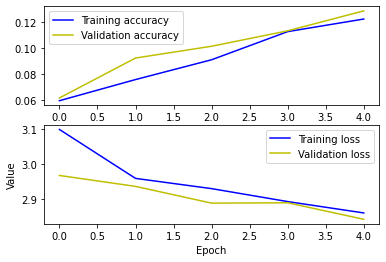

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, axs = plt.subplots(2)
axs[0].plot(epochs, acc, 'b', label='Training accuracy')
axs[0].plot(epochs, val_acc, 'y', label='Validation accuracy')
axs[0].legend(loc=0)

axs[1].plot(epochs, loss, 'b', label='Training loss')
axs[1].plot(epochs, val_loss, 'y', label='Validation loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Value')
axs[1].legend(loc=0)